In [1]:
import os
import sys
import gzip
import gpxpy
import shutil
import fitdecode
import gpxpy.gpx
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

import parse_fit
import parse_gpx
import parse_tcx

pd.options.display.max_columns = 100

%load_ext autoreload
%autoreload 2

In [223]:
os.listdir(".\\data\\DR\\16405121453_ACTIVITY.fit")

['16405121453', '16405121453.zip', '16405121453_ACTIVITY.fit']

,name,value,units,def_num,raw_value
0,timestamp,2024-07-14T09:26:12+00:00,,253,1089883572
1,position_lat,45.679548,deg,0,544978233
2,position_long,8.14625,deg,1,97188545
3,distance,32.1191,km,5,3211910
4,accumulated_power,1265395,watts,29,1265395
5,enhanced_altitude,1072.2,m,78,1072.2
6,altitude,1072.2,m,2,7861
7,enhanced_speed,9.5724,km/h,73,2.659
8,speed,9.5724,km/h,6,2659
9,power,302,watts,7,302


In [227]:
os.system("fitjson --pretty -o .\\data\\DR\\16405121453_ACTIVITY.json .\\data\\DR\\16405121453_ACTIVITY.fit")

0

In [2]:
list_of_fit_files = ["\\".join((".\\data", v)) for v in os.listdir(".\\data")
                     if ".gpx" not in v and ".gz" not in v]
list_of_gpx_files = ["\\".join((".\\data", v)) for v in os.listdir(".\\data")
                     if ".gpx" in v]

In [14]:
activities_df = pd.read_csv(".\\data\\activities.csv")
activities_df["Filename"] = activities_df["Filename"].apply(lambda v: v.split("/")[1].replace(".gz", "")
                                                            if isinstance(v, str) else v)

In [53]:
##########################################
### GET TO DATAFRAME PER EACH FIT FILE ###
##########################################
list_of_dfs_fit_points = []
list_of_dfs_fit_laps = []
for file in tqdm(list_of_fit_files):
    try:
        d_ = parse_fit.get_dataframes(file)
        list_of_dfs_fit_laps.append(d_[0])
        list_of_dfs_fit_points.append(d_[1])
    except:
        print(file)

fit_file_laps = pd.concat(list_of_dfs_fit_laps, ignore_index = True)
fit_file_points = pd.concat(list_of_dfs_fit_points, ignore_index = True)

fit_file_points = fit_file_points.merge(activities_df, left_on = "FileName", right_on = "Filename", how = "left")
fit_file_points = fit_file_points.drop("compressed_speed_distance", axis = 1)

fit_file_laps = fit_file_laps.merge(activities_df, left_on = "FileName", right_on = "Filename", how = "left")

# SAVE FILES TO AVOID RECOMPUTING EACH TIME
fit_file_laps.to_parquet(".\\data\\fit_file_laps.parquet")
fit_file_points.to_parquet(".\\data\\fit_file_points.parquet")

C:\Users\matti\AppData\Local\Temp\ipykernel_6428\4284890951.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fit_file_laps = pd.concat(list_of_dfs_fit_laps, ignore_index = True)
C:\Users\matti\AppData\Local\Temp\ipykernel_6428\4284890951.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fit_file_points = pd.concat(list_of_dfs_fit_points, ignore_index = True)


In [31]:
list_of_fit_files.index(".\\data\\12328861617.fit")

84

In [153]:
fn = "2024-06-15-15-18-57.fit"
#os.system("fitjson --pretty -o {} .\\data\\{}".format(fn.replace("fit", "json"), fn))
os.system("fitjson --pretty -o {} {}".format(fn.replace("fit", "json"), fn))

0

In [79]:
aaa = parse_fit.get_dataframes(list_of_fit_files[84])[1]

In [155]:
aaa["power"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10484   NaN
10485   NaN
10486   NaN
10487   NaN
10488   NaN
Name: power, Length: 10489, dtype: float64

In [75]:
aaa["slope"].notna().sum()

0

In [ ]:
##########################################
### GET TO DATAFRAME PER EACH FIT FILE ###
##########################################
list_of_dfs_fit_points = []
list_of_dfs_fit_laps = []
for file in tqdm(list_of_fit_files):
    d_ = parse_fit.get_dataframes(file)
    list_of_dfs_fit_laps.append(d_[0])
    list_of_dfs_fit_points.append(d_[1])

fit_file_laps = pd.concat(list_of_dfs_fit_laps, ignore_index = True)
fit_file_points = pd.concat(list_of_dfs_fit_points, ignore_index = True)

https://towardsdatascience.com/parsing-fitness-tracker-data-with-python-a59e7dc17418

In [55]:
# SAVE FILES TO AVOID RECOMPUTING EACH TIME
fit_file_laps = pd.read_parquet(".\\data\\fit_file_laps.parquet")
fit_file_points = pd.read_parquet(".\\data\\fit_file_points.parquet")

In [54]:
fit_file_points["Activity Name"].unique()

array(['Day 1: Verso Asti', 'Day 2: Monferrato ', 'Morning Ride',
       'Unico giro sotto i 100 km con salite da Milano?',
       'Affezionato alla Brianza + giro turistico in centro',
       'Long time no see Brianza', 'IL LOMBARDIA 2023',
       'Se fori fori nel punto più lontano da casa',
       'Treni da e per Milano', 'In paradiso day 1', 'A spasso day 2',
       'Prima Zwiftata', 'Evening Ride', 'Night Ride',
       'Zwift - Rolling Roads in Innsbruck', 'Zwift - FTP Test in France',
       'Zwift - Quick 2 by 2 in London',
       'Zwift - 2h in Z2 on Tempus Fugit in Richmond',
       'Zwift - Zwift Academy: Workout 1 | Explosive 30s in Yorkshire',
       'Zwift - Ocean Lava Cliffside Loop in Watopia',
       'Zwift - The Mega Pretzel in Watopia',
       'Zwift - Foundation in Paris',
       'Zwift - 2h in Z2 in Makuri Islands',
       'Zwift - 3h in Z2 in Yorkshire', 'Zwift - 2h in Z2 in London',
       'Zwift - TT#2 Core Workout in New York',
       'Zwift - High Cadence Day 6

In [32]:
def compute_power(weight, bike_wgt, speed, slope):
    
    # 1) rolling resistance
    C_rr = np.random.uniform(0.0025, 0.005) # coefficient of rolling resistance
    m = weight + bike_wgt # total mass
    g = 9.81

    P_rr = C_rr * m * speed * g

    # 2) Aerodynamic drag
    rho = 1.225 # air density
    C_d = 0.88 # drag coefficient
    A = 0.5 # frontal area

    P_aero = 0.5 * rho * C_d * A * np.power(speed, 3)

    # 3) Gradient resistance
    slope_rad = slope * (np.pi/180)
    P_gr = m * g * speed * np.sin(slope_rad)

    eta = 0.95 # drivetrain efficiency

    P = (P_rr + P_aero + P_gr) / eta

    return max(P, 0)

In [57]:
fit_file_points[fit_file_points["Activity Name"].str.contains("Mega")]#.isnull().sum()[:25]

,FileName,latitude,longitude,lap,altitude,cadence,calories,cycle_length,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,position_lat,position_long,power,slope,current_slope,filtered_altitude,resistance,speed,temperature,time_from_course,timestamp,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Private Note,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,...,Type,Start Time,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,Jump Count,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Media
196942,11005915940.fit,-11.647898,166.940496,1,1.6,15.0,NaN,None,0.30,1.6,1.115,NaN,88.0,-138964832,1991677696,177.0,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-11-25 10:56:21+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13940951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.02243,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/7b50ada7-0a2c-4df7-86c0-f87138020e56.jpg...
196943,11005915940.fit,-11.647898,166.940528,1,1.6,29.0,NaN,None,2.47,1.6,2.625,NaN,87.0,-138964832,1991678080,150.0,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-11-25 10:56:22+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13940951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.02243,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/7b50ada7-0a2c-4df7-86c0-f87138020e56.jpg...
196944,11005915940.fit,-11.647899,166.940560,1,1.6,32.0,NaN,None,5.55,1.6,3.374,NaN,87.0,-138964848,1991678464,147.0,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-11-25 10:56:23+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13940951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.02243,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media/7b50ada7-0a2c-4df7-86c0-f87138020e56.jpg...
196945,11005915940.fit,-11.647904,166.940582,1,1.6,56.0,NaN,None,9.35,1.6,3.908,NaN,87.0,-138964912,1991678720,97.0,NaN,NaN,NaN,NaN,NaN,NaN,None,2023-11-25 10:56:24+00:00,10278852415,"Nov 25, 2023, 10:56:21 AM",Zwift - The Mega Pretzel in Watopia,Virtual Ride,None,8965,45.02,163.0,54.0,False,NaN,Scott Addict RC (virtual),11005915940.fit,NaN,9.8,8965.0,8185.0,45026.089844,17.510157,5.501050,734.0,0.0,-6.4,373.799988,15.572855,0.019544,...,NaN,NaN,110.0,8584.0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [71]:
fit_file_points[fit_file_points["grade"].notna()].sort_values("timestamp")[["Activity Name", "Filename"]].drop_duplicates().head()

,Activity Name,Filename
639919,Back on the road,9293279157.fit
646423,Caldo e vento sugli Euganei🔥🌬,9323764869.fit
659551,Long Ride di Marzo,9364127943.fit
678713,Azzardando ghiaini a Teolo,9380658757.fit
686385,Ultima in Veneto,9399007407.fit


In [77]:
fit_file_points[[c for c in fit_file_points.columns if c not in activities_df.columns]].head()

,FileName,latitude,longitude,lap,altitude,cadence,calories,cycle_length,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,position_lat,position_long,power,slope,current_slope,filtered_altitude,resistance,speed,temperature,time_from_course,timestamp
0,10057687651.fit,45.467359,9.129405,1,NaN,NaN,0.0,None,0.0,NaN,0.00,0.0,NaN,542446724,108918042,NaN,NaN,NaN,NaN,NaN,0.00,27.0,None,2023-07-01 10:15:11+00:00
1,10057687651.fit,45.467359,9.129405,1,NaN,NaN,0.0,None,0.0,NaN,0.00,0.0,NaN,542446724,108918042,NaN,NaN,NaN,NaN,NaN,0.00,27.0,None,2023-07-01 10:15:12+00:00
2,10057687651.fit,45.467388,9.129429,1,NaN,0.0,0.0,None,0.0,NaN,1.03,0.0,87.0,542447068,108918332,NaN,NaN,NaN,NaN,NaN,1.03,27.0,None,2023-07-01 10:15:17+00:00
3,10057687651.fit,45.467388,9.129429,1,NaN,0.0,0.0,None,0.0,NaN,1.03,0.0,87.0,542447068,108918332,NaN,NaN,NaN,NaN,NaN,1.03,27.0,None,2023-07-01 10:15:18+00:00
4,10057687651.fit,45.467388,9.129429,1,NaN,0.0,0.0,None,0.0,NaN,1.03,0.0,88.0,542447068,108918332,NaN,NaN,NaN,NaN,NaN,1.03,27.0,None,2023-07-01 10:15:19+00:00


In [79]:
fit_file_points[fit_file_points["current_slope"].notna()].sort_values("timestamp")[["Activity Name", "Filename"]].drop_duplicates().head(10)

,Activity Name,Filename
414992,Di corsa per vedere MVDP,11731622819.fit
419807,Nel chill per arrivare al pranzo,11731633956.fit
425779,Tempo di tornare a casa,11731638612.fit
439855,Back to salite in real life,11783037013.fit
469890,Almeno la foratura questo giro è arrivata vici...,11938960488.fit
477403,Di fretta per la seconda colazione.,11946873823.fit
479519,Lunch Ride,11946879477.fit
480984,Social Ride with Manega,11993240140.fit
492095,Afternoon Ride,12002222131.fit
519193,Verso la BGY,12109816185.fit


In [94]:
x = fit_file_points[fit_file_points["FileName"] ==\
                    "11993240140.fit"].copy().sort_values("timestamp", ignore_index = True)
# drop all-empty columns
x = x.dropna(axis = 1, how = "all")
x["current_slope"] = x["current_slope"].bfill()

In [103]:
print("GOAL: {:.0f} W".format(x["Average Watts"].mean()))

GOAL: 115 W


In [82]:
# plt.figure(figsize = (16, 5))
# x["power"].plot()
# x["heart_rate"].plot()

In [105]:
x.head()

,FileName,latitude,longitude,lap,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate,position_lat,position_long,current_slope,filtered_altitude,speed,timestamp,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Average Watts,Calories,Relative Effort.1,Perceived Exertion,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,From Upload,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Flagged,Average Elapsed Speed,Dirt Distance,Media
0,11993240140.fit,45.462300,9.133125,1,133.0,NaN,0.00,133.0,0.000,82.0,542386366,108962421,-0.441101,NaN,0.000,2024-04-20 04:44:51+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
1,11993240140.fit,45.462300,9.133125,1,133.0,NaN,0.00,133.0,0.000,81.0,542386366,108962421,-0.441101,NaN,0.000,2024-04-20 04:44:52+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
2,11993240140.fit,45.462348,9.132939,1,141.4,NaN,0.00,141.4,1.782,103.0,542386938,108960203,-0.441101,NaN,1.782,2024-04-20 04:46:03+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
3,11993240140.fit,45.462306,9.132943,1,141.4,NaN,4.61,141.4,2.585,103.0,542386438,108960255,-0.441101,NaN,2.585,2024-04-20 04:46:04+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
4,11993240140.fit,45.462262,9.132943,1,141.6,NaN,9.45,141.6,2.818,102

In [98]:
##############

x.apply(lambda row: compute_power(64,
                                  row["Bike Weight"],
                                  row["enhanced_speed"],
                                  row["current_slope"]), axis = 1).mean()

152.64663689357457

In [111]:
x.head()

,FileName,latitude,longitude,lap,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate,position_lat,position_long,current_slope,filtered_altitude,speed,timestamp,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Average Watts,Calories,Relative Effort.1,Perceived Exertion,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,From Upload,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Flagged,Average Elapsed Speed,Dirt Distance,Media
0,11993240140.fit,45.462300,9.133125,1,133.0,NaN,0.00,133.0,0.000,82.0,542386366,108962421,-0.441101,NaN,0.000,2024-04-20 04:44:51+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
1,11993240140.fit,45.462300,9.133125,1,133.0,NaN,0.00,133.0,0.000,81.0,542386366,108962421,-0.441101,NaN,0.000,2024-04-20 04:44:52+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
2,11993240140.fit,45.462348,9.132939,1,141.4,NaN,0.00,141.4,1.782,103.0,542386938,108960203,-0.441101,NaN,1.782,2024-04-20 04:46:03+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
3,11993240140.fit,45.462306,9.132943,1,141.4,NaN,4.61,141.4,2.585,103.0,542386438,108960255,-0.441101,NaN,2.585,2024-04-20 04:46:04+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
4,11993240140.fit,45.462262,9.132943,1,141.6,NaN,9.45,141.6,2.818,102

In [288]:
def get_averages_activity_name(list_of_names, test_coefs = []):
   
    out = []
    for an in list_of_names:
        iter_df = fit_file_points[fit_file_points["Activity Name"] == an].copy()
        
        if len(test_coefs) == 0:
            iter_df["est_power"] = iter_df.apply(lambda row: compute_power(64,
                                                                           row["Bike Weight"],
                                                                           row["enhanced_speed"],
                                                                           row["current_slope"]), 
                                                 axis = 1)
        
        else:
            iter_df["est_power"] = iter_df.apply(lambda row: test_coefs[0] * compute_power(64, row["Bike Weight"],
                                                                                row["enhanced_speed"],
                                                                                row["current_slope"])\
                                                     + test_coefs[1] * row["cadence"]\
                                                     + test_coefs[2]*row["enhanced_speed"]\
                                                     + test_coefs[3], 
                                                 axis = 1)
            
            iter_df["est_power"] = iter_df["est_power"].apply(lambda v: max(0, v))
    
        # 3) Take the average power, avg cadence and avg heart rate

        iter_df = pd.DataFrame({"Filename": iter_df.iloc[0, 0],
                                "est_power": iter_df["est_power"].mean(),
                                "avg_cadence": iter_df["cadence"].mean(),
                                "avg_speed": iter_df["enhanced_speed"].mean(),
                                "tot_elevation_gain": iter_df["Elevation Gain"].mean(),
                                "tot_elevation_loss": iter_df["Elevation Loss"].mean(),
                                # "wind_speed": iter_df["Wind Speed"].mean(),
                                # "wind_gust": iter_df["Wind Gust"].mean(),
                                # "Calories": iter_df["Calories"].mean(),
                                "strava_power": iter_df["Average Watts"].mean()},
                               index = [0])

        out += [iter_df]
        
    out = pd.concat(out, ignore_index = True)
    
    return out

In [246]:
x.head()

,FileName,latitude,longitude,lap,altitude,cadence,distance,enhanced_altitude,enhanced_speed,heart_rate,position_lat,position_long,current_slope,filtered_altitude,speed,timestamp,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Average Watts,Calories,Relative Effort.1,Perceived Exertion,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,From Upload,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Flagged,Average Elapsed Speed,Dirt Distance,Media
0,11993240140.fit,45.462300,9.133125,1,133.0,NaN,0.00,133.0,0.000,82.0,542386366,108962421,-0.441101,NaN,0.000,2024-04-20 04:44:51+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
1,11993240140.fit,45.462300,9.133125,1,133.0,NaN,0.00,133.0,0.000,81.0,542386366,108962421,-0.441101,NaN,0.000,2024-04-20 04:44:52+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
2,11993240140.fit,45.462348,9.132939,1,141.4,NaN,0.00,141.4,1.782,103.0,542386938,108960203,-0.441101,NaN,1.782,2024-04-20 04:46:03+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
3,11993240140.fit,45.462306,9.132943,1,141.4,NaN,4.61,141.4,2.585,103.0,542386438,108960255,-0.441101,NaN,2.585,2024-04-20 04:46:04+00:00,11224674428,"Apr 20, 2024, 4:44:51 AM",Social Ride with Manega,Ride,Uno dei giorni più ventosi a memoria.\r\nStrea...,33184,150.32,189.0,319.0,False,Kross Vento 5.0,11993240140.fit,9.8,33184.0,23902.0,150321.296875,16.428125,6.289068,1604.433472,1545.0,122.099998,590.900024,44.437737,0.004324,115.0,71.205322,189.0,148.379776,114.907028,3984.0,319.0,6.0,0.0,630.0,0.0,1.0,1.713586e+09,1.0,8.64,7.28,1.67,0.62,1007.580017,2.4,4.99,305.0,0.0,1.713587e+09,1.713637e+09,0.375,11685373.0,0.0,1.0,0.08,27942.0,0.0,0.0,4.529933,1309.900024,media/cf1997e7-08ee-4324-87ad-65fe9d4dbc08.jpg...
4,11993240140.fit,45.462262,9.132943,1,141.6,NaN,9.45,141.6,2.818,102

In [289]:
######
# 1) get all activities that have current_slope
complete_activites = fit_file_points[(fit_file_points["current_slope"].notna()) &
                                     (fit_file_points["enhanced_speed"].notna()) &
                                     (fit_file_points["heart_rate"].notna()) &
                                     (fit_file_points["cadence"].notna()) &
                                     (fit_file_points["Bike Weight"].notna()) &
                                     (fit_file_points["Average Watts"].notna())]["Activity Name"].unique()


# 2) Compute for each indivually the "compute_power"
new_sublist = get_averages_activity_name(complete_activites)

# 4) find relation between P_(w1, w2, speed, slope) and avg power using avg cadence and avg heart rate

$\bar{P_{STRAVA}}\approx \bar{P}(w_{bike}, w_{athlete}, speed, slope)+\alpha\cdot\bar{Cad}+\beta\cdot\bar{HR}$

In [265]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

linreg = LinearRegression()

X = new_sublist.drop(["Filename", "strava_power"], axis = 1).values
y = new_sublist["strava_power"].values


linreg.fit(X, y)

LinearRegression()

In [ ]:
tree = DecisionTreeClassifier(random_state = 101, criterion = "entropy")
tree.fit(X_train, y_train)
print("Tree Train Accuracy: {:.4f}\n".format((accuracy_score(y_train, tree.predict(X_train)))))

# Compute impurities to look for an adequate pruning term
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Plot the impurity level given ccp_alpha
plt.plot(ccp_alphas[:-1], impurities[:-1], marker = "o", drawstyle = "steps-post")
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

# Tree Pruning (we are overfitting - Accuracy: 100% in training)
tree_params = {"ccp_alpha":[ccp_alphas[impurities < impty].max()
                            for impty in np.linspace(0.1, np.round(impurities.max()/2, 3),
                                                     num = 5)]}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 101, criterion = "entropy"),
                         tree_params, cv = 3, n_jobs = 6, verbose = 10,
                         return_train_score = True)
tree_grid.fit(X_train_val, y_train_val)

# Show the results
print("GridSearch Train+Val Accuracy: {:.4f}\n".format((accuracy_score(y_train_val,
                                                                       tree_grid.best_estimator_.predict(X_train_val)))))
print(classification_report(y_train_val, tree_grid.best_estimator_.predict(X_train_val)))
ConfusionMatrixDisplay(confusion_matrix(y_train_val, tree_grid.best_estimator_.predict(X_train_val)),
                       display_labels = tree_grid.best_estimator_.classes_).plot()
plt.title("Confusion matrix on Train+Val set")
plt.show()

<AxesSubplot:>

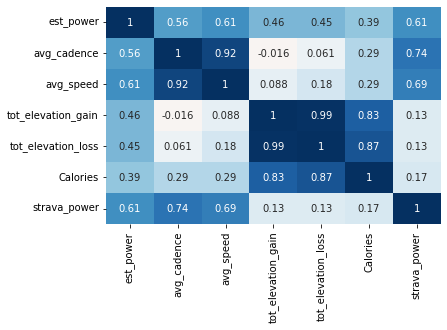

In [260]:
sns.heatmap(new_sublist.drop("Filename", axis = 1).corr(),
            vmin = -1, vmax = 1, cbar = False,
            annot = True, cmap = "RdBu")

In [266]:
linreg.coef_, linreg.intercept_

(array([-0.02007251,  3.58087851,  2.22753343,  0.16741535, -0.14321319,
        -0.01718612]),
 -97.44514750456817)

In [262]:
print("R^2: {:.2f}".format(r2_score(y, linreg.predict(X))))
print("RMSE: {:.2f}".format(root_mean_squared_error(y, linreg.predict(X))))
print("MAE: {:.2f}".format(mean_absolute_error(y, linreg.predict(X))))
print("MAPE: {:.2f} %".format(100*mean_absolute_percentage_error(y, linreg.predict(X))))

R^2: 0.74
RMSE: 20.37
MAE: 13.58
MAPE: 10.26 %


In [200]:
new_sublist.head()

,Filename,est_power,avg_cadence,avg_speed,tot_elevation_gain,tot_elevation_loss,strava_power
0,11731622819.fit,153.160189,65.834267,7.364536,27.141363,98.0,135.416107
1,11731633956.fit,152.163302,71.580326,6.913661,79.491653,122.0,117.730118
2,11731638612.fit,195.109996,67.743046,7.697693,37.856487,53.0,158.071152
3,11783037013.fit,148.246930,52.681266,6.199981,1464.984863,1324.0,110.255005
4,11938960488.fit,147.763919,57.050847,6.456024,808.278992,772.0,111.273834


In [164]:
x.apply(lambda row: max(0, 0.25454508 * compute_power(64, row["Bike Weight"], row["enhanced_speed"],
                                  row["current_slope"])\
                    + 2.50130964 * row["cadence"] - 4.97100469*row["speed"]), axis = 1).mean()

155.0993383180229

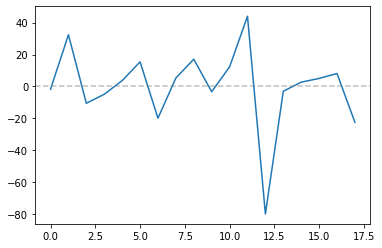

In [208]:
plt.plot(linreg.predict(X) - y)
plt.axhline(0, ls = '--', alpha = .5, color = "grey")

In [263]:
new_sublist.head()

,Filename,est_power,avg_cadence,avg_speed,tot_elevation_gain,tot_elevation_loss,Calories,strava_power
0,11731622819.fit,153.142303,65.834267,7.364536,27.141363,98.0,975.0,135.416107
1,11731633956.fit,152.177250,71.580326,6.913661,79.491653,122.0,982.0,117.730118
2,11731638612.fit,195.181513,67.743046,7.697693,37.856487,53.0,580.0,158.071152
3,11783037013.fit,148.246081,52.681266,6.199981,1464.984863,1324.0,3220.0,110.255005
4,11938960488.fit,147.734909,57.050847,6.456024,808.278992,772.0,2039.0,111.273834


In [335]:
############# CHECK RESULTS
check_results = get_averages_activity_name(complete_activites, test_coefs=[0.388889, 0.888889, 3.888889, -20.000000])

# [0.25473216, 2.50216196, -4.98278147, -33.32706833086844]
# [0.02417976, 2.10819699, 13.89020447, -100.0694754088366]
# [-0.02007251, 3.58087851, 2.22753343, -97.44514750456817]
# [0.388889, 0.888889, 3.888889, -20.000000]

In [336]:
check_results

,Filename,est_power,avg_cadence,avg_speed,tot_elevation_gain,tot_elevation_loss,strava_power
0,11731622819.fit,127.017392,65.834267,7.364536,27.141363,98.0,135.416107
1,11731633956.fit,129.466765,71.580326,6.913661,79.491653,122.0,117.730118
2,11731638612.fit,145.556445,67.743046,7.697693,37.856487,53.0,158.071152
3,11783037013.fit,108.812037,52.681266,6.199981,1464.984863,1324.0,110.255005
4,11938960488.fit,113.186014,57.050847,6.456024,808.278992,772.0,111.273834
5,11946873823.fit,142.331122,71.233019,7.899626,19.228052,86.0,135.265839
6,11946879477.fit,71.532153,61.685315,6.676252,67.764496,59.0,114.526321
7,11993240140.fit,117.279349,58.864728,6.584518,1604.433472,1545.0,114.907028
8,12109816185.fit,108.398464,59.184079,6.247793,193.968475,156.0,100.069176
9,12109821153.fit,164.656878,70.579806,8.147695,1441.614624,1353.0,165.281494


In [287]:
np.linspace(-20, -100, 10)

array([ -20.        ,  -28.88888889,  -37.77777778,  -46.66666667,
        -55.55555556,  -64.44444444,  -73.33333333,  -82.22222222,
        -91.11111111, -100.        ])

In [301]:
def grid_search():
    
    iter_ = []
    for w in tqdm(np.linspace(-0.5, 0.5, 10)):
        for c in np.linspace(0, 4, 10):
            for s in np.linspace(-10, 15, 10):
                for i in np.linspace(-20, -100, 10):
                    d_ = get_averages_activity_name(complete_activites,
                                                    test_coefs = [w, c, s, i])
                    
                    d_ = pd.concat([d_, pd.DataFrame({"w": [w]*len(d_),
                                                      "c": [c]*len(d_),
                                                      "s": [s]*len(d_),
                                                      "i": [i]*len(d_)})],
                                   axis = 1)
                    
                    iter_ += [d_]
                    
    return iter_

In [303]:
out_gs = grid_search()
try:
    pd.concat(out_gs, ignore_index = True).to_parquet(".\\data\\output_grid_search.parquet")
except:
    pd.concat(out_gs, ignore_index = True).to_excel(".\\data\\output_grid_search.xlsx", index = False)

In [304]:
out_gs_df = pd.concat(out_gs, ignore_index = True)

In [332]:
out_gs_df_grouped = pd.DataFrame([[v["w"].values[0], v["c"].values[0], v["s"].values[0],
                                   v["i"].values[0], abs(v["est_power"] - v["strava_power"]).mean()]
                                  for v in out_gs], columns = ["w", "c", "s", "i", "delta_power"])

In [334]:
out_gs_df_grouped.sort_values(by = "delta_power", key = lambda v: abs(v))

,w,c,s,i,delta_power
8250,0.388889,0.888889,3.888889,-20.000000,14.542483
8341,0.388889,1.333333,1.111111,-28.888889,14.620215
7091,0.277778,0.000000,15.000000,-28.888889,14.817450
8420,0.388889,1.777778,-4.444444,-20.000000,14.822598
7260,0.277778,0.888889,6.666667,-20.000000,14.836523
...,...,...,...,...,...
9980,0.500000,4.000000,12.222222,-20.000000,248.682290
9992,0.500000,4.000000,15.000000,-37.777778,249.791849
8990,0.388889,4.000000,15.000000,-20.000000,251.217635
9991,0.500000,4.000000,15.000000,-28.888889,258.266196


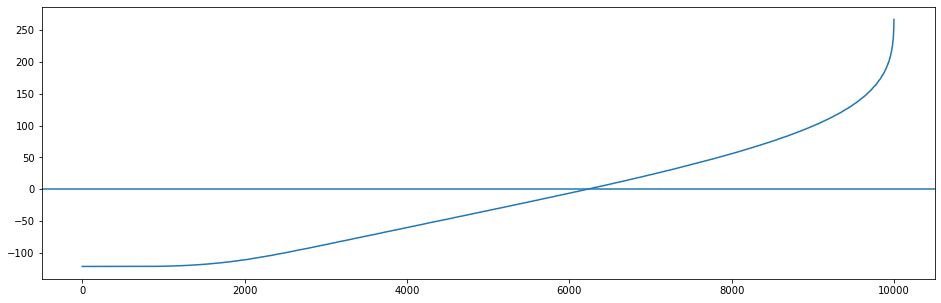

In [321]:
plt.figure(figsize = (16, 5))
plt.plot(sorted(out_gs_df_grouped["delta_power"].tolist()))
plt.axhline(0)

In [308]:
out_gs[4000]

,Filename,est_power,avg_cadence,avg_speed,tot_elevation_gain,tot_elevation_loss,strava_power,w,c,s,i
0,11731622819.fit,0.0,65.834267,7.364536,27.141363,98.0,135.416107,-0.055556,0.0,-10.0,-20.0
1,11731633956.fit,0.0,71.580326,6.913661,79.491653,122.0,117.730118,-0.055556,0.0,-10.0,-20.0
2,11731638612.fit,0.0,67.743046,7.697693,37.856487,53.0,158.071152,-0.055556,0.0,-10.0,-20.0
3,11783037013.fit,0.0,52.681266,6.199981,1464.984863,1324.0,110.255005,-0.055556,0.0,-10.0,-20.0
4,11938960488.fit,0.0,57.050847,6.456024,808.278992,772.0,111.273834,-0.055556,0.0,-10.0,-20.0
5,11946873823.fit,0.0,71.233019,7.899626,19.228052,86.0,135.265839,-0.055556,0.0,-10.0,-20.0
6,11946879477.fit,0.0,61.685315,6.676252,67.764496,59.0,114.526321,-0.055556,0.0,-10.0,-20.0
7,11993240140.fit,0.0,58.864728,6.584518,1604.433472,1545.0,114.907028,-0.055556,0.0,-10.0,-20.0
8,12109816185.fit,0.0,59.184079,6.247793,193.968475,156.0,100.069176,-0.055556,0.0,-10.0,-20.0
9,12109821153.fit,0.0,70.579806,8.147695,1441.614624,1353.0,165.281494,-0.055556,0.0,-10.0,-20.0


In [ ]:



print((check_results[check_results["strava_power"] < 200]["est_power"] - check_results[check_results["strava_power"] < 200]["strava_power"]).describe())
plt.plot(check_results[check_results["strava_power"] < 200]["est_power"] - check_results[check_results["strava_power"] < 200]["strava_power"])
plt.axhline(0, ls = '--', alpha = .5, color = "grey")

In [272]:
check_results.drop(["tot_elevation_gain", "tot_elevation_loss", "Calories"], axis = 1).sample(3)

,Filename,est_power,avg_cadence,avg_speed,strava_power
10,12241648253.fit,162.347331,65.153719,7.169125,120.936188
15,12563550522.fit,66.357131,35.695413,4.478343,46.385403
14,12563548515.fit,148.571529,61.886964,7.058562,130.669891


count    17.000000
mean     27.979237
std      22.961848
min     -26.291282
25%      17.901637
50%      26.697352
75%      41.411143
max      79.155701
dtype: float64


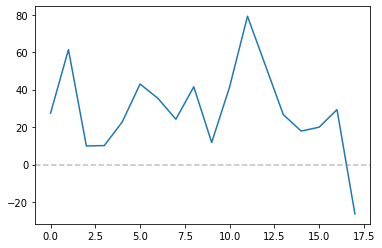

In [270]:
print((check_results[check_results["strava_power"] < 200]["est_power"] - check_results[check_results["strava_power"] < 200]["strava_power"]).describe())
plt.plot(check_results[check_results["strava_power"] < 200]["est_power"] - check_results[check_results["strava_power"] < 200]["strava_power"])
plt.axhline(0, ls = '--', alpha = .5, color = "grey")